<a href="https://www.kaggle.com/code/darshanprabhu09/n9-feature-engineering-pca-dimension-reduction?scriptVersionId=132386713" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <span style="color: #FF4500;"> STEP-1 : <br> <br>IMPORTING LIBRARIES </span>

In [4]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor 

## <span style="color: #FF4500;"> STEP-2 : <br> <br>IMPORTING DATASET </span>

#### <span style="color: orange;"> We will be using dropna() to drop or remove the null records. </span>

In [5]:
df = pd.read_csv("/kaggle/input/california-housing-dataset/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### <span style="color: orange;"> 2.1 : We will be using dropna() to drop or remove the null records. </span>

In [6]:
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### <span style="color: orange;"> 2.2 : Splitting the dataset into "Training" and "Testing" dataset. </span>

#### <span style="color: orange;"> 2.2.1: Training dataset. </span>

In [7]:
df = df.sample(frac = 1 , random_state = 2)


#Retrieving "17,000" rows in to training dataset:
train_df = df[:17000] 

train_df 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
356,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
2192,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND
9161,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN
168,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY
13155,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
10272,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,297100.0,<1H OCEAN
1904,-120.00,38.87,12.0,1437.0,268.0,395.0,144.0,4.2250,127600.0,INLAND
12648,-121.47,38.50,17.0,1895.0,424.0,620.0,417.0,1.7188,137500.0,INLAND
20402,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN


In [8]:
# resetting the Index :

train_df = train_df.reset_index(drop = True)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
1,-119.95,36.80,30.0,1233.0,214.0,620.0,199.0,3.4297,112500.0,INLAND
2,-118.49,34.42,23.0,4166.0,756.0,2082.0,743.0,4.4107,213400.0,<1H OCEAN
3,-122.24,37.79,27.0,1632.0,492.0,1171.0,429.0,2.3173,125000.0,NEAR BAY
4,-121.45,36.86,11.0,1613.0,335.0,1617.0,342.0,3.1375,146200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16995,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,297100.0,<1H OCEAN
16996,-120.00,38.87,12.0,1437.0,268.0,395.0,144.0,4.2250,127600.0,INLAND
16997,-121.47,38.50,17.0,1895.0,424.0,620.0,417.0,1.7188,137500.0,INLAND
16998,-118.86,34.21,26.0,3354.0,659.0,2020.0,648.0,4.1576,211800.0,<1H OCEAN


#### <span style="color: orange;"> 2.2.2: Testing dataset. </span>

In [9]:
df = df.sample(frac=1,random_state = 2)

#Retrieving remaining rows in to testing dataset:
test_df = df[17000:] 

test_df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10643,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN
9732,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN
4597,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN
9485,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND
5533,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10432,-117.62,33.43,27.0,3858.0,1062.0,2321.0,873.0,3.3155,231000.0,NEAR OCEAN
4288,-118.30,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,218800.0,<1H OCEAN
1868,-119.95,38.95,22.0,1058.0,352.0,851.0,269.0,2.0200,87500.0,INLAND
2324,-119.73,36.83,14.0,3348.0,491.0,1584.0,493.0,5.0828,111400.0,INLAND


In [10]:
# Resetting the value of "testing data"
test_df = test_df.reset_index(drop = True)
test_df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN
1,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN
2,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN
3,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND
4,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3428,-117.62,33.43,27.0,3858.0,1062.0,2321.0,873.0,3.3155,231000.0,NEAR OCEAN
3429,-118.30,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,218800.0,<1H OCEAN
3430,-119.95,38.95,22.0,1058.0,352.0,851.0,269.0,2.0200,87500.0,INLAND
3431,-119.73,36.83,14.0,3348.0,491.0,1584.0,493.0,5.0828,111400.0,INLAND


#### <span style="color: orange;"> Defining the "Dependent variables" (Y-Test) and (Y-Train) : </span>


In [11]:
y_train = train_df["median_house_value"].to_numpy()
y_test = test_df["median_house_value"].to_numpy()

print("The shape of Y_train is {} and Y_test is {}".format(y_train.shape,y_test.shape))

The shape of Y_train is (17000,) and Y_test is (3433,)


## <span style="color: #FF4500;"> STEP-3 : <br> <br> EXPLORATORY DATA ANALYSIS. </span>


<p style="padding: 10px; background-color: CYAN
          ; margin: 0; color: BLACK ; font-family: New Times Roman; font-size: 135%; text-align: center; border-radius: 5px; overflow: hidden; font-weight: 500;"> -I-<br> Using a baseline model. </p>

In [12]:
#Average or Mean of the median_house_value.
average_median_house_value = train_df["median_house_value"].mean()
print("average_median_house_value:",average_median_house_value)

average_median_house_value: 207189.25817647058


#### <span style="color: orange;"> Getting the error of Baseline Model : </span>


In [13]:
# Getting the baseline value for future predictions.
baseline_model_test_predictions = [average_median_house_value]*len(test_df)

#Getting the mean absolute error.
mean_absolute_error(baseline_model_test_predictions,  y_test) 

90341.440416254

The value for mean absolute error we recieved is indeed terrible since it is in 90,000 . Lets do some Feature Engineering 

## <span style="color: #FF4500;"> STEP-4 : <br> <br> FEATURE ENGINEERING. </span>


<p style="padding: 10px; background-color: CYAN
          ; margin: 0; color: BLACK ; font-family: New Times Roman; font-size: 135%; text-align: center; border-radius: 5px; overflow: hidden; font-weight: 500;"> -II-<br> Dimensionality reduction </p>

### <span style="color: #FF4500;"> STEP-4.1 : <br> <br> DIMENSIONALITY REDUCTION (PCA) : </span>


In [14]:
#Observing the correlation bewteen the total_room , total_bedrooms and households.

train_df[['total_rooms','total_bedrooms','households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.931023,0.918161
total_bedrooms,0.931023,1.000000,0.979402
households,0.918161,0.979402,1.000000


### From the above statement we can see as the total number of rooms increases the total number of bedrooms seems to be increasing as well


### <span style="color: #FF4500;"> Getting x_test_3 and x_train_3 and having three inputs into it as : 
total_rooms	 | total_bedrooms	 |  households
    

In [15]:
x_train_3 = train_df[['total_rooms','total_bedrooms','households']].to_numpy()
x_train_3.shape

(17000, 3)

In [16]:
x_test_3 = test_df[['total_rooms','total_bedrooms','households']].to_numpy()
x_test_3.shape

(3433, 3)

### <span style="color: #FF4500;"> Using Random Forest Regression model to get error in (X_train_3 , Y_train) and (X_test_3 , Y_test) :

In [17]:
# Fitting of the data .
forest_base = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_3 , y_train)

# predicting future values for x_test_3 based on past values .
forest_base_test_predictions = forest_base.predict(x_test_3)

#Checking the mean absolute error
mean_absolute_error(forest_base_test_predictions , y_test)

79383.95763574619

### <span style="color: #FF4500;"> Importing PCA (Principal component Analysis):

In [18]:
# Importing PCA .
from sklearn.decomposition import PCA

# Using PCA function and passing arguments as n_components  having value "2".
pca = PCA(n_components = 2)

# Fitting the data into the model.
pcs = pca.fit(x_train_3)

pca

PCA(n_components=2)

### <span style="color: #FF4500;"> Using PCA to transform (X_train_3) and (X_test_3) into X_train_PCA and X_test_PCA :

In [19]:
x_train_pca = pca.transform(x_train_3)
x_test_pca = pca.transform(x_test_3)

x_train_pca.shape , x_test_pca.shape

((17000, 2), (3433, 2))

### <span style="color: #FF4500;"> Using Random Forest Regression model to get error in (X_train_PCA , Y_train) and (X_test_PCA , Y_test) :

In [20]:
# Fitting in the training model.
forest_pca = RandomForestRegressor(n_estimators = 50 , max_depth = 5).fit(x_train_pca,y_train)

# using .predict() to predict future values using testing set.
pca_predict = forest_pca.predict(x_test_pca)

# Cheking the error rate using MAE
mean_absolute_error(y_test,pca_predict)

77654.57793761422

<p style="padding: 10px; background-color: CYAN
          ; margin: 0; color: BLACK ; font-family: New Times Roman; font-size: 135%; text-align: center; border-radius: 5px; overflow: hidden; font-weight: 500;"> -III-<br> Pre-Processing OR Scaling. </p>

In [21]:
# three libraries to be used for scaling:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer

# For visualizations ,
import matplotlib.pyplot as plt


### <span style="color: #FF4500;"> Scalar :

(array([1.444e+04, 2.091e+03, 3.120e+02, 8.700e+01, 4.000e+01, 1.600e+01,
        7.000e+00, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([-1.20387697,  0.5898911 ,  2.38365917,  4.17742724,  5.97119531,
         7.76496338,  9.55873145, 11.35249952, 13.14626759, 14.94003566,
        16.73380373]),
 <BarContainer object of 10 artists>)

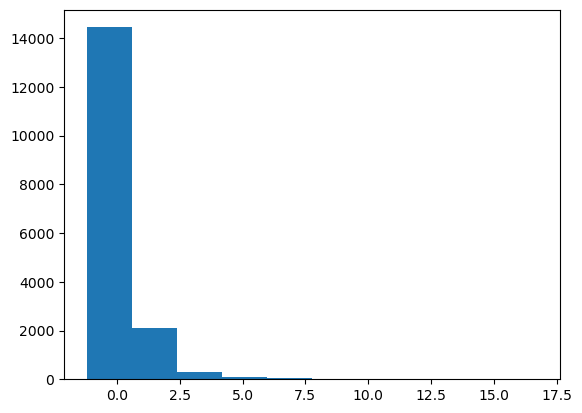

In [22]:
# fitting of the data :
scalar = StandardScaler().fit(x_train_3)

# Transforming the value :
x3_scaler_transform = scalar.transform(x_train_3)

#plotting value :
plt.hist(x3_scaler_transform[:,0])

In [25]:
#Printing X_train _scale :
x3_scaler_transform

array([[ 0.06141578,  0.08041603,  0.04664826],
       [-0.64492147, -0.76725387, -0.78510314],
       [ 0.69337772,  0.50896026,  0.62887424],
       ...,
       [-0.34285735, -0.27277976, -0.2184725 ],
       [ 0.32287007,  0.28056032,  0.38194804],
       [-0.73891725, -0.66364977, -0.65774121]])

(array([1.444e+04, 2.091e+03, 3.120e+02, 8.700e+01, 4.000e+01, 1.600e+01,
        7.000e+00, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

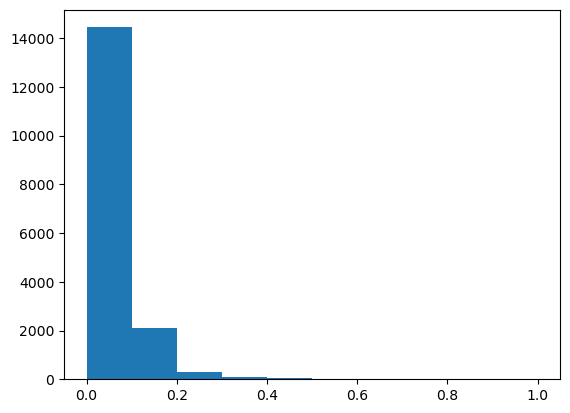

In [26]:
# fitting of the data :
minmax = MinMaxScaler().fit(x_train_3)

# Transforming the value :
x3_minmax_scaler_transform = minmax.transform(x_train_3)

#plotting value :
plt.hist(x3_minmax_scaler_transform[:,0])